In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import math
from scipy.stats import multivariate_normal

In [333]:
data_train = "q2train.xlsx"
data_test = "q2test.xlsx"

In [334]:
read_train = pd.read_excel(data_train)
read_test = pd.read_excel(data_test)

In [335]:
list_train_aptitude = list(read_train['Aptitude'])
list_train_verbal = list(read_train['Verbal'])
list_train_label = list(read_train['Label'])

list_test_aptitude = list(read_test['Aptitude'])
list_test_verbal = list(read_test['Verbal'])

In [336]:
maxm_app=max(list_train_aptitude)
minm_app=min(list_train_aptitude)

maxm_ver=max(list_train_verbal)
minm_ver=min(list_train_verbal)
maxm_app,minm_app

(99.37252693, 30.15882245)

In [337]:
tmaxm_app=max(list_test_aptitude)
tminm_app=min(list_test_aptitude)

tmaxm_ver=max(list_test_verbal)
tminm_ver=min(list_test_verbal)

In [338]:
for i in range(len(list_train_aptitude)):
    list_train_aptitude[i]=(list_train_aptitude[i]-minm_app)/(maxm_app-minm_app)
    list_train_verbal[i]=(list_train_verbal[i]-minm_ver)/(maxm_ver-minm_ver)    

In [339]:
for i in range(len(list_test_aptitude)):
    list_test_aptitude[i]=(list_test_aptitude[i]-tminm_app)/(tmaxm_app-tminm_app)
    list_test_verbal[i]=(list_test_verbal[i]-tminm_ver)/(tmaxm_ver-tminm_ver) 

In [340]:
itr = 0
alpha = 0.001
theta = [0, 0, 0]
m=len(list_train_label)

In [342]:
start = time.time()
while itr<10000:
    su1=0.0
    su2=0.0
    su3=0.0
    for i in range(m):
        sigm=1.0/(1+np.exp(-(theta[0] + theta[1]*list_train_aptitude[i] + theta[2]*list_train_verbal[i])))
        temp=(list_train_label[i]-sigm)
        su1 = su1+ temp
        su2 = su2+ temp*list_train_aptitude[i]
        su3 = su3+ temp*list_train_verbal[i]
        
    theta[0] = theta[0] + alpha*su1
    theta[1] = theta[1] + alpha*su2 
    theta[2] = theta[2] + alpha*su3 
    itr = itr + 1
    
end = time.time()
print("time taken to converge = ", end - start)

time taken to converge =  0.0010025501251220703


In [343]:
theta

[-3.2896940314747503, 5.763351011731899, 1.0885007714121313]

In [316]:
# graph

In [317]:
ans1_app=[]
ans1_verb=[]

ans0_app=[]
ans0_verb=[]

In [318]:
for i in range(m):
    if(list_train_label[i]==0):
        ans0_app.append(list_train_aptitude[i])
        ans0_verb.append(list_train_verbal[i])
    else:
        ans1_app.append(list_train_aptitude[i])
        ans1_verb.append(list_train_verbal[i])

In [326]:
point = np.linspace(0.2,0.9)
slope_x2 = -(((theta[1]*point)/theta[2]) + (theta[0]/theta[2]))

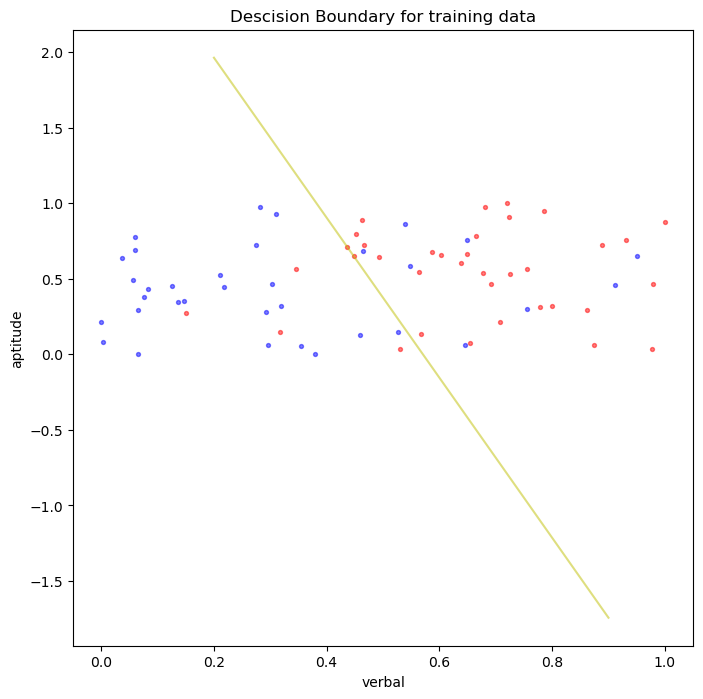

In [327]:
fig = plt.figure(figsize = (8, 8))
plt.plot(point,slope_x2, "-y", alpha = 0.5)
plt.scatter(ans0_app,ans0_verb, s = 8, color = "blue", alpha = 0.5)
plt.scatter(ans1_app,ans1_verb, s = 8, color = "red", alpha = 0.5)
plt.ylabel(r'aptitude')
plt.xlabel(r'verbal')
plt.title("Descision Boundary for training data") 
plt.show()

In [328]:
# plot for test data

In [329]:
test0_app=[]
test0_ver=[]

test1_app=[]
test1_ver=[]

In [330]:
f=len(list_test_aptitude)
for i in range(f):
    if((1/np.exp(-(theta[0]+ theta[1]*list_test_aptitude[i] +theta[2]*list_test_verbal[i])))>=0.5):
        test1_app.append(list_test_aptitude[i])
        test1_ver.append(list_test_verbal[i])
    else:
        test0_app.append(list_test_aptitude[i])
        test0_ver.append(list_test_verbal[i])

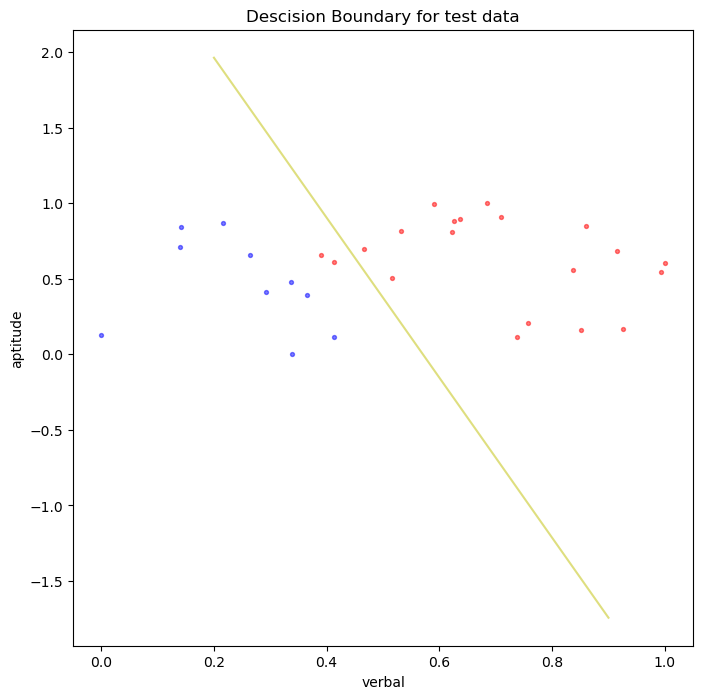

In [331]:
fig = plt.figure(figsize = (8, 8))
plt.plot(point,slope_x2, "-y", alpha = 0.5)
plt.scatter(test0_app,test0_ver, s = 8, color = "blue", alpha = 0.5)
plt.scatter(test1_app,test1_ver, s = 8, color = "red", alpha = 0.5)
plt.ylabel(r'aptitude')
plt.xlabel(r'verbal')
plt.title("Descision Boundary for test data") 
plt.show()